This notebook can be run on mybinder: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgricad-gitlab.univ-grenoble-alpes.fr%2Fchatelaf%2Fml-sicom3a/master?filepath=notebooks%2F/1_introduction/N1_Linear_Classification.ipynb)

In [17]:
# Import modules
%matplotlib inline
import matplotlib
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [18]:
# Select random seed
random_state = 0

We use scikit-learn to generate a toy 2D data set (two features $x_1$ and $x_2$)  for binary classification  (two classes) 
 - each sample $(x_1,x_2)$ in the dataset is plotted as a 2D point where the two features $x_1$ and $x_2$ are displayed along the abscissa and ordinate axes respectively
 - the corresponding class label $y$ is displayed as a color mark (e.g., yellow or purple)

Text(0, 0.5, '$x_2$')

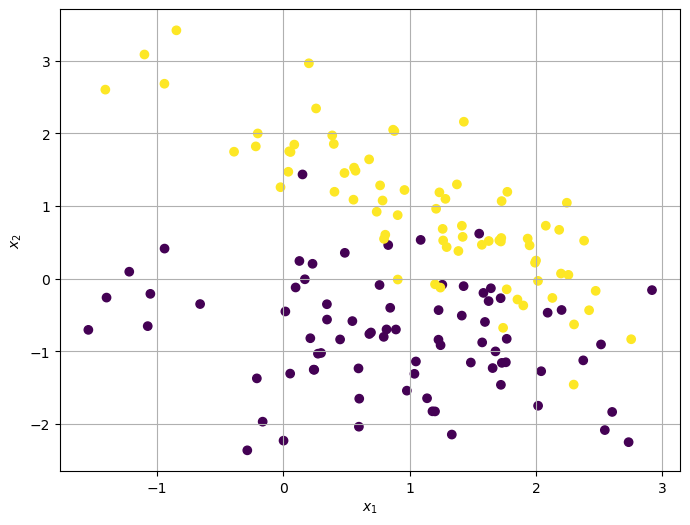

In [19]:
from sklearn.datasets import make_classification
#X are the features (aka inputs, ...), y the labels (aka responses, targets, output...)
X,y = make_classification(n_features=2, n_redundant=0, n_informative=2, n_samples=150,
                          random_state=random_state, n_clusters_per_class=1)
# make the class labels y_i as +1 or -1
y[y==0]=-1
# display the dataset
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid(True)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#plt.savefig("2d_binary_classif.pdf")

Then, a linear model is used to learn the classification function/rule.

In [20]:
from sklearn import linear_model
# Train a linear model, namely  RidgeClassifier, 
# this includes standard linear regression as particular case (alpha=0)
model = linear_model.RidgeClassifier(alpha=0)
model.fit(X,y)

RidgeClassifier(alpha=0)

Text(0, 0.5, '$x_2$')

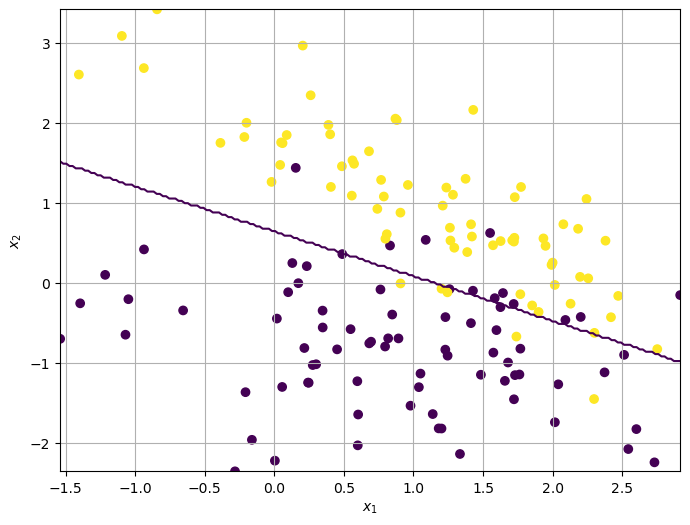

In [21]:
# Plot the decision functions
XX, YY = np.meshgrid(np.linspace(X[:,0].min(), X[:,0].max(),200),
                     np.linspace(X[:,1].min(), X[:,1].max(),200))
XY = np.vstack([XX.flatten(), YY.flatten()]).T
yp = model.predict(XY)
plt.figure(figsize=(8,6))
plt.contour(XX,YY,yp.reshape(XX.shape),[0])
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid("on")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [22]:
# What are the weights for x_1 and x_2?
print('Prediction rule  : Yhat = sign( {:5.2} x_1 {:+5.2} x_2 {:+.2} )'.format(model.coef_[0][0], model.coef_[0][1], model.intercept_[0]))
# What are the parameter values of the linear boundary equation x_2=a x_1 + b?
a = -model.coef_[0][0]/model.coef_[0][1]
b = -model.intercept_[0]/model.coef_[0][1]
print('Boundary equation : x_2 = {:5.2} x_1 {:+5.2}'.format(a,b))

Prediction rule  : Yhat = sign(  0.37 x_1 +0.66 x_2 -0.42 )
Boundary equation : x_2 = -0.56 x_1 +0.64


### Exercise
Change the number of informative features from  `n_informative=2̀` to `n_informative=1` in the `make_classification()` procedure, regenerate the data set and fit the classification rule. Interpret now the new decision boundary: are the two variables of equal importance in predicting the class of the data?

In [23]:
#get the documentation for sklearn RidgeClassification object
linear_model.RidgeClassifier?

Init signature:
linear_model.RidgeClassifier(
    alpha=1.0,
    *,
    fit_intercept=True,
    copy_X=True,
    max_iter=None,
    tol=0.0001,
    class_weight=None,
    solver='auto',
    positive=False,
    random_state=None,
)
Docstring:     
Classifier using Ridge regression.

This classifier first converts the target values into ``{-1, 1}`` and
then treats the problem as a regression task (multi-output regression in
the multiclass case).

Read more in the :ref:`User Guide <ridge_regression>`.

Parameters
----------
alpha : float, default=1.0
    Regularization strength; must be a positive float. Regularization
    improves the conditioning of the problem and reduces the variance of
    the estimates. Larger values specify stronger regularization.
    Alpha corresponds to ``1 / (2C)`` in other linear models such as
    :class:`~sklearn.linear_model.LogisticRegression` or
    :class:`~sklearn.svm.LinearSVC`.

fit_intercept : bool, default=True
    Whether to calculate the intercept